In [1]:
import pandas as pd
import numpy as np
import xarray as xr
from pathlib import Path
import os
import matplotlib.pyplot as plt
%matplotlib widget

Giving them anomalies will save some time:. And using LONG dataset is better because it is more realistic and does not weight too strongly soil moisture.

In [3]:
mrso_full = xr.open_dataset('/local/gmiloshe/PLASIM/Data_Plasim_LONG/ANO_LONG_mrso.nc')

*I recommend that we work with Data_Plasim_LONG because the day-night cycle is more realistic and reduces the unusual effectiveness of just mrso*

In [4]:
mrso_full

<xarray.Dataset>
Dimensions:    (time: 1200000, bnds: 2, lon: 128, lat: 64)
Coordinates:
  * time       (time) object 0001-05-01 10:30:00 ... 0100-09-30 10:30:00
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat        (lat) float64 87.86 85.1 82.31 79.53 ... -82.31 -85.1 -87.86
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    mrso       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    Conventions:  CF-1.0
    history:      Tue Sep 28 19:53:58 2021: cdo ydaysub /ClimateDynamics/Medi...
    title:        PUMA/PLASIM DATA
    frequency:    day
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...

In [5]:
1200000/16

75000.0

In [6]:
mrso500 = mrso_full.isel({'time': slice(0,75000)})
mrso500

<xarray.Dataset>
Dimensions:    (time: 75000, bnds: 2, lon: 128, lat: 64)
Coordinates:
  * time       (time) object 0001-05-01 10:30:00 ... 0100-09-30 10:30:00
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat        (lat) float64 87.86 85.1 82.31 79.53 ... -82.31 -85.1 -87.86
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    mrso       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    Conventions:  CF-1.0
    history:      Tue Sep 28 19:53:58 2021: cdo ydaysub /ClimateDynamics/Medi...
    title:        PUMA/PLASIM DATA
    frequency:    day
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...

In [13]:
mrso500_north = mrso500.where(mrso500.lat > 0, drop=True)

In [25]:
mrso500_ns = mrso500_north.where(mrso500_north.time.dt.month < 9, drop=True)
mrso500_ns

<xarray.Dataset>
Dimensions:    (time: 60000, bnds: 2, lat: 32, lon: 128)
Coordinates:
  * time       (time) object 0001-05-01 10:30:00 ... 0100-08-30 10:30:00
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat        (lat) float64 87.86 85.1 82.31 79.53 ... 9.767 6.977 4.186 1.395
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds, lat) object 0001-05-01 00:00:00 ... 0100-08-30 21...
    mrso       (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    Conventions:  CF-1.0
    history:      Tue Sep 28 19:53:58 2021: cdo ydaysub /ClimateDynamics/Medi...
    title:        PUMA/PLASIM DATA
    frequency:    day
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...

In [31]:
mrso500_ns.time[24000]

<xarray.DataArray 'time' ()>
array(cftime.Datetime360Day(1, 5, 1, 10, 30, 0, 0, has_year_zero=True),
      dtype=object)
Coordinates:
    time     object 0001-05-01 10:30:00
Attributes:
    standard_name:  time
    bounds:         time_bnds
    axis:           T

In [16]:
mrso500.to_netcdf('mrso500.nc')

/home/gmiloshe/miniconda3/envs/myenvnew/lib/python3.9/site-packages/xarray/coding/times.py:123: SerializationWarning: Ambiguous reference date string: 1-5-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-5-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [19]:
mrso500_2 = xr.open_dataset('data/mrso500.nc')

mrso500 == mrso500_2

<xarray.Dataset>
Dimensions:    (time: 75000, lon: 128, lat: 64, bnds: 2)
Coordinates:
  * time       (time) object 0001-05-01 10:30:00 ... 0100-09-30 10:30:00
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat        (lat) float64 87.86 85.1 82.31 79.53 ... -82.31 -85.1 -87.86
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) bool True True True True ... True True True True
    mrso       (time, lat, lon) bool True True True True ... True True True True

To Alessnadro: Perhaps you can upload the mrso500 as well as t2m500 when you get the chance. Meanwhile I am running some tests on the data...

In [29]:
if not os.path.exists('data'):
    !mkdir data
    !wget -O data/mrso10o.nc "https://drive.google.com/uc?export=download&id=14TB1TJ-EF5v-Z5a3LjVw0DXT2o3m45JL"
else:
    print('data already here')

data already here


In [2]:
link = "https://drive.google.com/uc?export=download&id=14TB1TJ-EF5v-Z5a3LjVw0DXT2o3m45JL"
def fetch(name, destination='./data', reload=False):
    destination = Path(destination).resolve()
    if not os.path.exists(destination):
        destination.mkdir(parents=True)

    file = destination / name
    if not os.path.exists(file) or reload:
        os.system(f"wget -O {file} \"{link}\"")
    else:
        print('file already loaded')

In [5]:
link = "https://mycore.core-cloud.net/index.php/s/r9XRFyOQgmsAvNG/download"

In [6]:
fetch('mrso')

--2022-03-24 12:50:24--  https://mycore.core-cloud.net/index.php/s/r9XRFyOQgmsAvNG/download
Resolving mycore.core-cloud.net (mycore.core-cloud.net)... 194.57.138.247, 194.57.138.240
Connecting to mycore.core-cloud.net (mycore.core-cloud.net)|194.57.138.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 413481 (404K) [application/octet-stream]
Saving to: ‘/ClimateDynamics/MediumSpace/ClimateLearningFR/alovo/EW2/data/mrso’

     0K .......... .......... .......... .......... .......... 12% 16.0M 0s
    50K .......... .......... .......... .......... .......... 24% 34.2M 0s
   100K .......... .......... .......... .......... .......... 37% 23.5M 0s
   150K .......... .......... .......... .......... .......... 49% 26.0M 0s
   200K .......... .......... .......... .......... .......... 61% 24.2M 0s
   250K .......... .......... .......... .......... .......... 74% 29.8M 0s
   300K .......... .......... .......... .......... .......... 86% 30.7M 0s
   350K .......

## Doing things nicely

In [48]:
def cut(full_field, nyears=500, last_month=8, min_lat=28):
    # take the first n_years
    f = full_field.isel({'time': slice(0,150*nyears)})
    # remove excessive months
    f = f.where(f.time.dt.month <= last_month, drop=True)
    # remove low latitudes
    f = f.where(f.lat > min_lat, drop=True)

    return f

In [49]:
mrso_full = xr.open_dataset('/local/gmiloshe/PLASIM/Data_Plasim_LONG/ANO_LONG_mrso.nc')
mrso = cut(mrso_full)
mrso

<xarray.Dataset>
Dimensions:    (time: 60000, bnds: 2, lat: 22, lon: 128)
Coordinates:
  * time       (time) object 0001-05-01 10:30:00 ... 0100-08-30 10:30:00
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat        (lat) float64 87.86 85.1 82.31 79.53 ... 37.67 34.88 32.09 29.3
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds, lat) object 0001-05-01 00:00:00 ... 0100-08-30 21...
    mrso       (time, lat, lon) float32 0.0 0.0 0.0 ... -0.00021 2.832e-05
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    Conventions:  CF-1.0
    history:      Tue Sep 28 19:53:58 2021: cdo ydaysub /ClimateDynamics/Medi...
    title:        PUMA/PLASIM DATA
    frequency:    day
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...

In [50]:
mrso.to_netcdf('data/mrso.nc')

/scratch/alovo/miniconda3/envs/python3.9/lib/python3.9/site-packages/xarray/coding/times.py:123: SerializationWarning: Ambiguous reference date string: 1-5-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-5-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [51]:
t2m_full = xr.open_dataset('/local/gmiloshe/PLASIM/Data_Plasim_LONG/ANO_LONG_tas.nc')
t2m = cut(t2m_full)
t2m

<xarray.Dataset>
Dimensions:    (time: 60000, bnds: 2, lat: 22, lon: 128)
Coordinates:
  * time       (time) object 0001-05-01 10:30:00 ... 0100-08-30 10:30:00
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat        (lat) float64 87.86 85.1 82.31 79.53 ... 37.67 34.88 32.09 29.3
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds, lat) object 0001-05-01 00:00:00 ... 0100-08-30 21...
    tas        (time, lat, lon) float32 0.7941 0.8237 0.8505 ... 0.7547 1.329
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    Conventions:  CF-1.0
    history:      Fri Oct 01 20:31:36 2021: cdo ydaysub /ClimateDynamics/Medi...
    title:        PUMA/PLASIM DATA
    frequency:    day
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...

In [52]:
t2m.to_netcdf('data/tas.nc')

/scratch/alovo/miniconda3/envs/python3.9/lib/python3.9/site-packages/xarray/coding/times.py:123: SerializationWarning: Ambiguous reference date string: 1-5-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-5-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [53]:
zg500_full = xr.open_dataset('/local/gmiloshe/PLASIM/Data_Plasim_LONG/ANO_LONG_zg500.nc')
zg500 = cut(zg500_full)
zg500

<xarray.Dataset>
Dimensions:    (time: 60000, bnds: 2, lat: 22, lev: 1, lon: 128)
Coordinates:
  * time       (time) object 0001-05-01 10:30:00 ... 0100-08-30 10:30:00
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat        (lat) float64 87.86 85.1 82.31 79.53 ... 37.67 34.88 32.09 29.3
  * lev        (lev) float64 500.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds, lat) object 0001-05-01 00:00:00 ... 0100-08-30 21...
    zg         (time, lev, lat, lon) float32 141.1 143.4 145.6 ... 4.055 -4.439
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    Conventions:  CF-1.0
    history:      Wed Sep 29 11:33:55 2021: cdo ydaysub /ClimateDynamics/Medi...
    title:        PUMA/PLASIM DATA
    frequency:    day
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...

In [54]:
zg500.to_netcdf('data/zg500.nc')

In [2]:
lsm_full = xr.open_dataset('/local/gmiloshe/PLASIM/Data_Plasim_inter/CONTROL_lsmask.nc')
lsm_full

<xarray.Dataset>
Dimensions:  (lon: 128, lat: 64, lev: 10, time: 720)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 87.86 85.1 82.31 79.53 ... -79.53 -82.31 -85.1 -87.86
  * lev      (lev) float64 100.0 200.0 300.0 400.0 ... 700.0 800.0 900.0 1e+03
  * time     (time) object 0001-01-01 00:00:00 ... 0001-01-30 23:00:00
Data variables:
    lsm      (time, lat, lon) float32 ...
Attributes:
    title:        PUMA/PLASIM DATA
    history:      Created by PumaBurner 7.4
    Conventions:  CF-1.0

In [3]:
lsm = lsm_full.isel(dict(time=0, lev=0))
lsm

<xarray.Dataset>
Dimensions:  (lon: 128, lat: 64)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 87.86 85.1 82.31 79.53 ... -79.53 -82.31 -85.1 -87.86
    lev      float64 100.0
    time     object 0001-01-01 00:00:00
Data variables:
    lsm      (lat, lon) float32 ...
Attributes:
    title:        PUMA/PLASIM DATA
    history:      Created by PumaBurner 7.4
    Conventions:  CF-1.0

In [9]:
lsm = lsm.drop_vars(['time', 'lev'])
lsm

<xarray.Dataset>
Dimensions:  (lon: 128, lat: 64)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 87.86 85.1 82.31 79.53 ... -79.53 -82.31 -85.1 -87.86
Data variables:
    lsm      (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0 1.0
Attributes:
    title:        PUMA/PLASIM DATA
    history:      Created by PumaBurner 7.4
    Conventions:  CF-1.0

In [10]:
lsm.to_netcdf('data/lsmask.nc')

### Fixing the time axis

In [9]:
mrso = xr.open_dataset('data/mrso.nc')
mrso

<xarray.Dataset>
Dimensions:    (time: 60000, bnds: 2, lat: 22, lon: 128)
Coordinates:
  * time       (time) object 0001-05-01 10:30:00 ... 0500-08-30 10:30:00
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat        (lat) float64 87.86 85.1 82.31 79.53 ... 37.67 34.88 32.09 29.3
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds, lat) object ...
    mrso       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    Conventions:  CF-1.0
    history:      Tue Sep 28 19:53:58 2021: cdo ydaysub /ClimateDynamics/Medi...
    title:        PUMA/PLASIM DATA
    frequency:    day
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...

In [5]:
60000/12000

5.0

In [7]:
@np.vectorize
def traslate(a, y):
    return a.replace(year = a.year + y)

In [8]:
new_time = []
n = 12000
for c in range(5):
    new_time.append(traslate(mrso.time[c*n:(c+1)*n], 100*c))

new_time = np.concatenate(new_time)

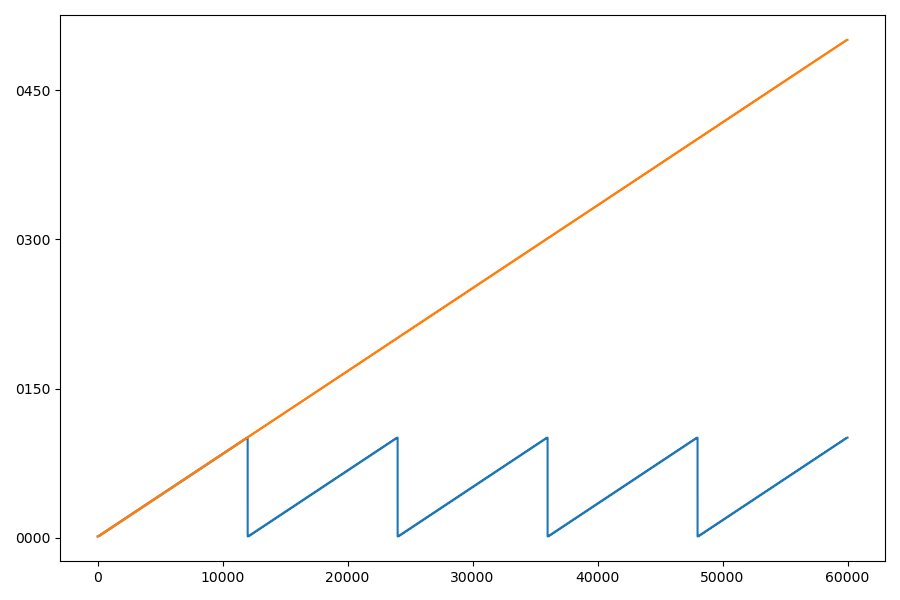

In [9]:
plt.close(1)
fig, ax = plt.subplots(num=1, figsize=(9,6))

plt.plot(mrso.time)
plt.plot(new_time)

fig.tight_layout()

In [17]:
mrso = mrso.assign_coords({'time': new_time})
mrso.to_netcdf('data/mrso2.nc')

In [18]:
tas = xr.open_dataset('data/tas.nc')
tas = tas.assign_coords({'time': new_time})
tas.to_netcdf('data/tas_.nc')

In [19]:
zg500 = xr.open_dataset('data/zg500.nc')
zg500 = zg500.assign_coords({'time': new_time})
zg500.to_netcdf('data/zg500_.nc')

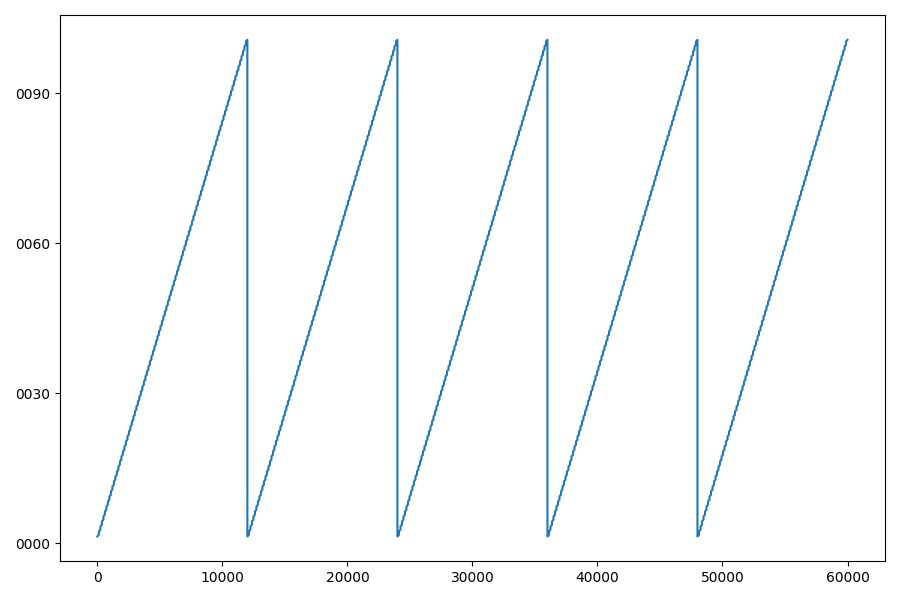

In [21]:
tas = xr.open_dataset('data/tas.nc')

plt.close(1)
fig, ax = plt.subplots(num=1, figsize=(9,6))

plt.plot(tas.time)

fig.tight_layout()

## Rolling

In [11]:
def Greenwich2Bering(xa:xr.DataArray):
    xa_ = xa.roll(lon=64, roll_coords=True) # rolling by 180 degrees
    xa_ = xa_.assign_coords({'lon': (xa_.lon + 180) % 360 - 180}) # keep the longitude monotonically increasing, useful for the plots
    return xa_

In [12]:
mrso = xr.open_dataset('data/mrso.nc')
mrso

<xarray.Dataset>
Dimensions:    (time: 60000, bnds: 2, lat: 22, lon: 128)
Coordinates:
  * time       (time) object 0001-05-01 10:30:00 ... 0500-08-30 10:30:00
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat        (lat) float64 87.86 85.1 82.31 79.53 ... 37.67 34.88 32.09 29.3
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds, lat) object ...
    mrso       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    Conventions:  CF-1.0
    history:      Tue Sep 28 19:53:58 2021: cdo ydaysub /ClimateDynamics/Medi...
    title:        PUMA/PLASIM DATA
    frequency:    day
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...

In [13]:
mrso_da = Greenwich2Bering(mrso.mrso)
mrso_da

<xarray.DataArray 'mrso' (time: 60000, lat: 22, lon: 128)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * time     (time) object 0001-05-01 10:30:00 ... 0500-08-30 10:30:00
  * lon      (lon) float64 -180.0 -177.2 -174.4 -171.6 ... 171.6 174.4 177.2
  * lat      (lat) float64 87.86 85.1 82.31 79.53 ... 37.67 34.88 32.09 29.3
Attributes:
    standard_name:  lwe_of_soil_moisture_content
    long_name:      lwe_of_soil_moisture_content
    units:          m
    code:           140

In [14]:
mrso_da.to_netcdf('data/mrso_da.nc')

In [15]:
mda = xr.open_dataarray('data/mrso_da.nc')

In [16]:
mda

<xarray.DataArray 'mrso' (time: 60000, lat: 22, lon: 128)>
[168960000 values with dtype=float32]
Coordinates:
  * time     (time) object 0001-05-01 10:30:00 ... 0500-08-30 10:30:00
  * lon      (lon) float64 -180.0 -177.2 -174.4 -171.6 ... 171.6 174.4 177.2
  * lat      (lat) float64 87.86 85.1 82.31 79.53 ... 37.67 34.88 32.09 29.3
Attributes:
    standard_name:  lwe_of_soil_moisture_content
    long_name:      lwe_of_soil_moisture_content
    units:          m
    code:           140

In [18]:
gparea = xr.open_dataset('data/gparea_ds.nc').cell_area

In [20]:
gparea = Greenwich2Bering(gparea)
gparea

<xarray.DataArray 'cell_area' (lat: 64, lon: 128)>
array([[3.75702819e+09, 3.75702819e+09, 3.75702819e+09, ...,
        3.75702819e+09, 3.75702819e+09, 3.75702819e+09],
       [8.25261640e+09, 8.25261640e+09, 8.25261640e+09, ...,
        8.25261640e+09, 8.25261640e+09, 8.25261640e+09],
       [1.29519271e+10, 1.29519271e+10, 1.29519271e+10, ...,
        1.29519271e+10, 1.29519271e+10, 1.29519271e+10],
       ...,
       [1.29519271e+10, 1.29519271e+10, 1.29519271e+10, ...,
        1.29519271e+10, 1.29519271e+10, 1.29519271e+10],
       [8.25261640e+09, 8.25261640e+09, 8.25261640e+09, ...,
        8.25261640e+09, 8.25261640e+09, 8.25261640e+09],
       [3.75702819e+09, 3.75702819e+09, 3.75702819e+09, ...,
        3.75702819e+09, 3.75702819e+09, 3.75702819e+09]])
Coordinates:
  * lon      (lon) float64 -180.0 -177.2 -174.4 -171.6 ... 171.6 174.4 177.2
  * lat      (lat) float64 87.86 85.1 82.31 79.53 ... -79.53 -82.31 -85.1 -87.86
Attributes:
    standard_name:  area
    long_name:      area of grid cell
    units:          m2

In [21]:
gparea.to_netcdf('data/gparea.nc')

In [22]:
lsm = Greenwich2Bering(xr.open_dataset('data/lsmask_ds.nc').lsm)
lsm

<xarray.DataArray 'lsm' (lat: 64, lon: 128)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -180.0 -177.2 -174.4 -171.6 ... 171.6 174.4 177.2
  * lat      (lat) float64 87.86 85.1 82.31 79.53 ... -79.53 -82.31 -85.1 -87.86
Attributes:
    long_name:      land_binary_mask
    standard_name:  land_binary_mask
    units:          1
    code:           172
    grid_type:      gaussian

In [23]:
lsm.to_netcdf('data/lsmask.nc')

In [25]:
tas = Greenwich2Bering(xr.open_dataset('data/tas_ds.nc').tas)
tas

<xarray.DataArray 'tas' (time: 60000, lat: 22, lon: 128)>
array([[[-0.19624388, -0.23554833, -0.2746803 , ..., -0.07927785,
         -0.11793925, -0.15695839],
        [ 0.1870111 ,  0.10858625,  0.03329197, ...,  0.4314554 ,
          0.3495953 ,  0.26769668],
        [-0.32992837, -0.33896244, -0.33769897, ..., -0.23250851,
         -0.27644923, -0.30919275],
        ...,
        [ 1.3271154 ,  1.806379  ,  2.2268577 , ..., -0.8292889 ,
         -0.56193966,  0.42047578],
        [ 1.3352325 ,  1.3550591 ,  1.7155434 , ..., -0.33911553,
          0.30808648,  1.0669453 ],
        [ 0.6519802 ,  0.7438936 ,  1.4288777 , ...,  0.37305838,
          0.6335458 ,  0.7854836 ]],

       [[ 1.087451  ,  1.0770538 ,  1.0668468 , ...,  1.1197892 ,
          1.1088331 ,  1.0980647 ],
        [ 0.10286425,  0.0580284 ,  0.01592259, ...,  0.2475497 ,
          0.19830602,  0.14985347],
        [-0.43428645, -0.5753507 , -0.7073447 , ...,  0.02343793,
         -0.13264678, -0.2860044 ],
...
        [ 0.6765996 ,  0.5070224 ,  0.3375549 , ..., -0.18433395,
          0.4764069 ,  0.7485682 ],
        [ 0.4387836 ,  0.31026882,  0.10867772, ...,  0.15240239,
          0.3137232 ,  0.42311913],
        [ 0.39431703,  0.27982166,  0.0629018 , ..., -0.0044372 ,
          0.14745331,  0.32006675]],

       [[-0.17518237, -0.2087255 , -0.24171515, ..., -0.07532512,
         -0.10795163, -0.14154536],
        [ 0.9611183 ,  0.7614277 ,  0.56620264, ...,  1.5677292 ,
          1.3658211 ,  1.1631323 ],
        [ 1.1283346 ,  0.88775635,  0.6539927 , ...,  1.8609685 ,
          1.6178837 ,  1.3727405 ],
        ...,
        [ 0.74137616,  0.5948949 ,  0.2604449 , ...,  0.4754961 ,
          0.6167365 ,  0.69136333],
        [ 0.46973088,  0.33767506,  0.05787584, ...,  0.7801788 ,
          0.59658086,  0.45120034],
        [ 0.25289536,  0.11477588, -0.1415634 , ...,  0.31219214,
          0.2765494 ,  0.22344635]]], dtype=float32)
Coordinates:
  * time     (time) object 0001-05-01 10:30:00 ... 0500-08-30 10:30:00
  * lon      (lon) float64 -180.0 -177.2 -174.4 -171.6 ... 171.6 174.4 177.2
  * lat      (lat) float64 87.86 85.1 82.31 79.53 ... 37.67 34.88 32.09 29.3
Attributes:
    standard_name:  air_temperature_2m
    long_name:      air_temperature_2m
    units:          K
    code:           167

In [26]:
tas.to_netcdf('data/tas.nc')

In [28]:
zg500 = Greenwich2Bering(xr.open_dataset('data/zg500_ds.nc').zg)
zg500

<xarray.DataArray 'zg' (time: 60000, lev: 1, lat: 22, lon: 128)>
array([[[[ 6.71841660e+01,  6.46508408e+01,  6.22721786e+01, ...,
           7.56271439e+01,  7.26813660e+01,  6.98635635e+01],
         [-1.49394619e+00, -7.71284628e+00, -1.34702969e+01, ...,
           1.96370487e+01,  1.22143745e+01,  5.15884256e+00],
         [-4.19282646e+01, -5.11649666e+01, -5.97548752e+01, ...,
          -1.07341795e+01, -2.16586552e+01, -3.20773201e+01],
         ...,
         [-5.42534828e+01, -4.04956741e+01, -2.49006844e+01, ...,
          -7.55405121e+01, -7.10201797e+01, -6.44130173e+01],
         [-1.36120682e+01, -3.38410807e+00,  6.25660133e+00, ...,
          -3.54118042e+01, -2.98719349e+01, -2.27140541e+01],
         [ 6.18014288e+00,  1.19672890e+01,  1.79266796e+01, ...,
          -1.16802511e+01, -5.22712946e+00,  7.25884676e-01]]],


       [[[ 9.21239090e+01,  9.00130920e+01,  8.79900513e+01, ...,
           9.89402084e+01,  9.65928955e+01,  9.43189468e+01],
         [ 4.12621727e+01,  3.63505287e+01,  3.17138996e+01, ...,
           5.75148010e+01,  5.18594437e+01,  4.64366989e+01],
         [-2.64507504e+01, -3.39276619e+01, -4.07557564e+01, ...,
...
         [-2.36980247e+00, -1.96881771e-01,  4.01981449e+00, ...,
          -1.56968431e+01, -1.18620710e+01, -6.30609846e+00],
         [-8.17991638e+00, -7.12650204e+00, -6.50719261e+00, ...,
          -2.17310524e+01, -2.01957321e+01, -1.37252560e+01]]],


       [[[-1.06797409e+02, -1.08660538e+02, -1.10566154e+02, ...,
          -1.01583672e+02, -1.03247765e+02, -1.04989754e+02],
         [-4.53112526e+01, -5.09030571e+01, -5.67680397e+01, ...,
          -3.02454643e+01, -3.50449982e+01, -4.00269394e+01],
         [ 2.83441734e+01,  1.92978535e+01,  9.54372883e+00, ...,
           5.07818985e+01,  4.41257896e+01,  3.66343231e+01],
         ...,
         [ 1.53051653e+01,  2.05337582e+01,  3.04173737e+01, ...,
           6.27394140e-01,  7.25518608e+00,  1.19754229e+01],
         [ 3.67198229e+00,  6.97034121e+00,  1.60223503e+01, ...,
          -3.02177882e+00,  6.01097763e-01,  2.88231969e+00],
         [-2.80805802e+00, -2.05223107e+00,  3.35714221e+00, ...,
          -1.01416883e+01, -6.32002783e+00, -3.13650274e+00]]]],
      dtype=float32)
Coordinates:
  * time     (time) object 0001-05-01 10:30:00 ... 0500-08-30 10:30:00
  * lon      (lon) float64 -180.0 -177.2 -174.4 -171.6 ... 171.6 174.4 177.2
  * lat      (lat) float64 87.86 85.1 82.31 79.53 ... 37.67 34.88 32.09 29.3
  * lev      (lev) float64 500.0
Attributes:
    standard_name:  geopotential_height
    long_name:      geopotential_height
    units:          m
    code:           156

In [29]:
zg500.to_netcdf('data/zg500.nc')

### Remove the extra level from geopotential

In [2]:
zg500 = xr.open_dataarray('data/zg500.nc')

In [7]:
zg500

<xarray.DataArray 'zg' (time: 60000, lev: 1, lat: 22, lon: 128)>
[168960000 values with dtype=float32]
Coordinates:
  * time     (time) object 0001-05-01 10:30:00 ... 0500-08-30 10:30:00
  * lon      (lon) float64 -180.0 -177.2 -174.4 -171.6 ... 171.6 174.4 177.2
  * lat      (lat) float64 87.86 85.1 82.31 79.53 ... 37.67 34.88 32.09 29.3
  * lev      (lev) float64 500.0
Attributes:
    standard_name:  geopotential_height
    long_name:      geopotential_height
    units:          m
    code:           156

In [8]:
zg500 = zg500.squeeze(drop=True)
zg500

<xarray.DataArray 'zg' (time: 60000, lat: 22, lon: 128)>
[168960000 values with dtype=float32]
Coordinates:
  * time     (time) object 0001-05-01 10:30:00 ... 0500-08-30 10:30:00
  * lon      (lon) float64 -180.0 -177.2 -174.4 -171.6 ... 171.6 174.4 177.2
  * lat      (lat) float64 87.86 85.1 82.31 79.53 ... 37.67 34.88 32.09 29.3
Attributes:
    standard_name:  geopotential_height
    long_name:      geopotential_height
    units:          m
    code:           156

In [10]:
zg500.to_netcdf('data/zg500_.nc')